In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import curves.bezier as bezier
import curves.fitCurves as fit
import StressTools as tools
import utils
import fitting
import cycloidData
from scipy import stats, interpolate

In [2]:
cycloids = cycloidData.loadAllCycloids()

## Test With Cubic interpolation

300

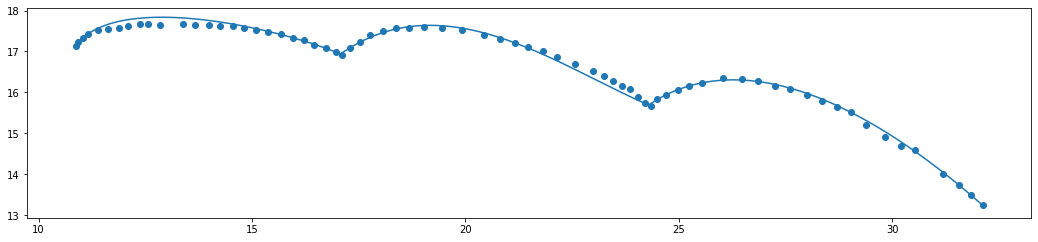

In [3]:
arcPoints = cycloids['alex'].arcs[0]
arc = cycloids['alex'].curve

lonRange = arc['lon'].max() - arc['lon'].min()
latRange = arc['lat'].max() - arc['lat'].min()

ratio = latRange / lonRange

# arc = fitting.createCycloidBezier(cycloids['alex'].arcs, maxError=0.09)
allPoints = pd.DataFrame(np.vstack(cycloids['alex'].arcs), columns=['lon', 'lat'])

plt.figure(figsize=(18,18*ratio))
plt.plot(arc['lon'], arc['lat'])
plt.scatter(allPoints['lon'], allPoints['lat'])


# func = interpolate.interp1d(arcPoints['lon'], arcPoints['lat'], kind='cubic')
# minVal = arc['lon'].min()
# maxVal = arc['lon'].max()
# step = (maxVal - minVal) / 100

# steps = np.array([arc['lon'].iloc[0], *np.arange(minVal, maxVal, step), arc['lon'].iloc[-1]])
# lats = func(steps)

# plt.figure(figsize=(12,2))
# plt.plot(steps, lats)
# plt.scatter(arcPoints['lon'], arcPoints['lat'], alpha=0.25)

display(len(arc))

### The result is quite lumpy

## Let's Try Regression Lines

In [4]:
import numpy.polynomial.polynomial as poly

plt.figure(figsize=(12,2))
coefs = poly.polyfit(arc['lon'], arc['lat'], 4)
lats = poly.polyval(steps, coefs)

plt.plot(steps, lats)
plt.scatter(arcPoints['lon'], arcPoints['lat'], alpha=0.25)

NameError: name 'steps' is not defined

<Figure size 864x144 with 0 Axes>

In [ ]:
coefs

In [ ]:
p = poly.Polynomial(coefs)

plt.plot(*p.linspace())

In [ ]:
arcPoints

In [ ]:
df = pd.read_csv('./obsDataCorrected/Alex.csv')

plt.figure(figsize=(18, 3))
plt.scatter(df['lon'], df['lat'])

In [ ]:
arc

500

4

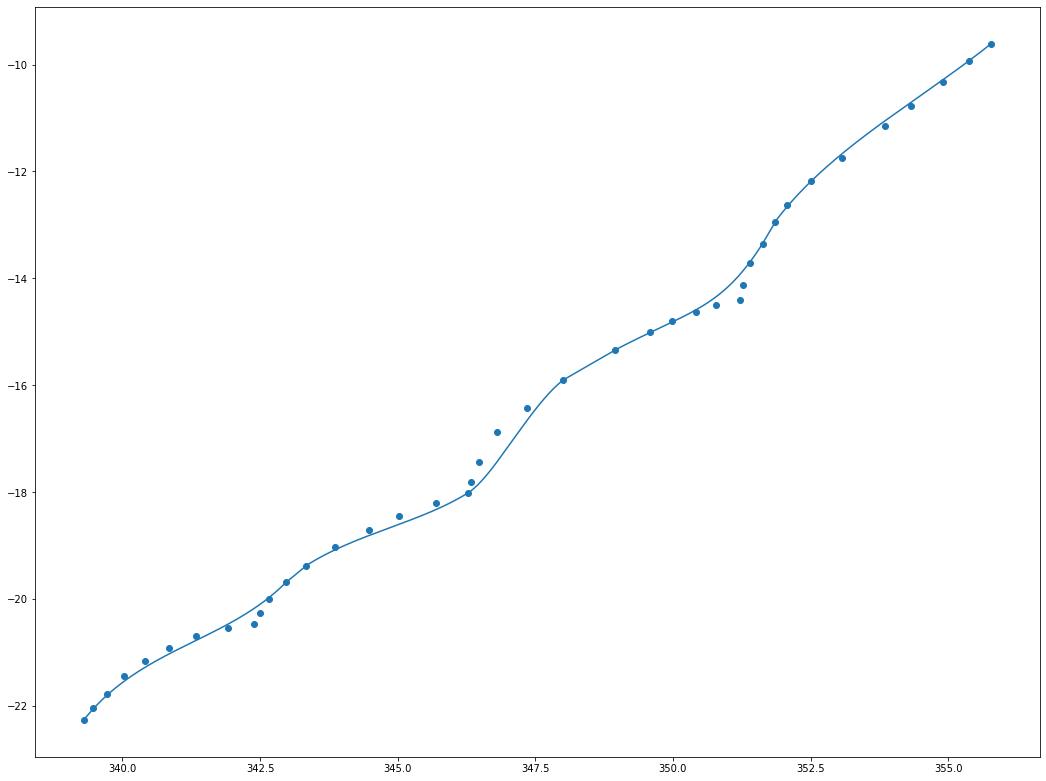

In [6]:
current = 'yaphet'

arcPoints = cycloids[current].arcs[0]
arc = cycloids[current].curve

# arc = fitting.createCycloidBezier(cycloids[current].arcs, maxError=0.09)

allPoints = pd.DataFrame(np.vstack(cycloids[current].arcs), columns=['lon', 'lat'])


# arc['lon'] = convertLon(arc['lon'])
# allPoints['lon'] = convertLon(allPoints['lon'])

# arc = fitting.createCycloidBezier(cycloids[current].arcs, maxError=0.0575)

lonRange = arc['lon'].max() - arc['lon'].min()
latRange = arc['lat'].max() - arc['lat'].min()

ratio = latRange / lonRange


plt.figure(figsize=(18,18*ratio))
# plt.figure(figsize=(18,4))
plt.plot(arc['lon'], arc['lat'])
plt.scatter(allPoints['lon'], allPoints['lat'])


display(len(arc))
display(len(cycloids[current].arcs))

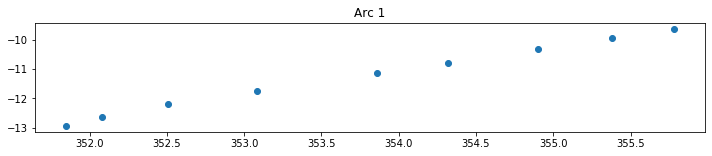

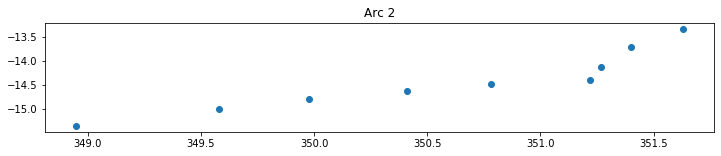

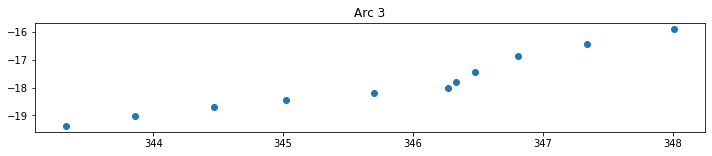

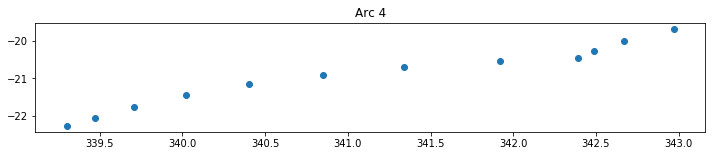

In [7]:

for i in range(len(cycloids[current].arcs)):
    allPoints = cycloids[current].arcs[i]

    plt.figure(figsize=(12,2))
    plt.scatter(allPoints['lon'], allPoints['lat'])
    plt.title(f'Arc {i+1}')